In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import re
df = pd.read_csv('/content/drive/MyDrive/data sets of titanic/bestsellers with categories.csv')

In [ ]:
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

Seaborn verion 0.13.1


In [ ]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
len(df)

550

In [ ]:
df[["Author","User Rating"]]

,Author,User Rating
0,JJ Smith,4.7
1,Stephen King,4.6
2,Jordan B. Peterson,4.7
3,George Orwell,4.7
4,National Geographic Kids,4.8
...,...,...
545,Jeff Kinney,4.9
546,Jen Sincero,4.7
547,Jen Sincero,4.7
548,Jen Sincero,4.7


In [ ]:
df.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [ ]:
df.notnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
545,True,True,True,True,True,True,True
546,True,True,True,True,True,True,True
547,True,True,True,True,True,True,True
548,True,True,True,True,True,True,True


In [ ]:
df["Author"].unique()

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

In [ ]:
df["Author"].value_counts()

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64

# BAR PLOT

<Axes: xlabel='User Rating'>

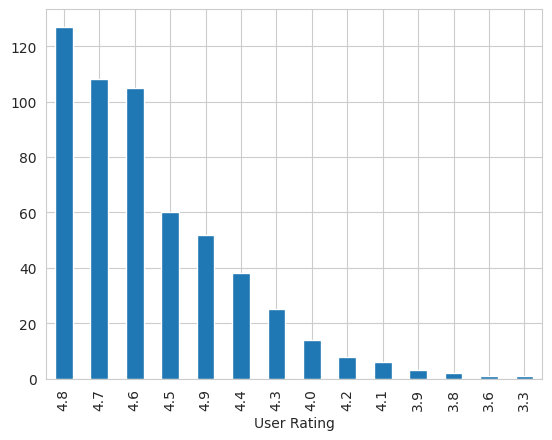

In [ ]:
df['User Rating'].value_counts().plot(kind="bar")

<Axes: xlabel='Author'>

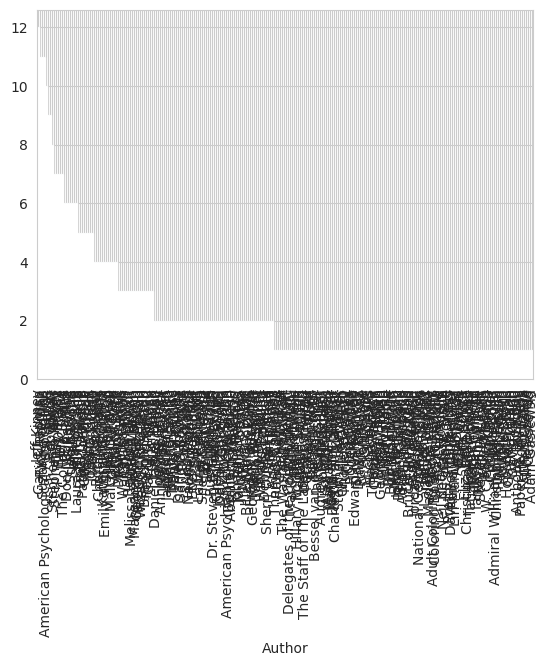

In [ ]:
df['Author'].value_counts().plot(kind="bar")

<Axes: xlabel='Price'>

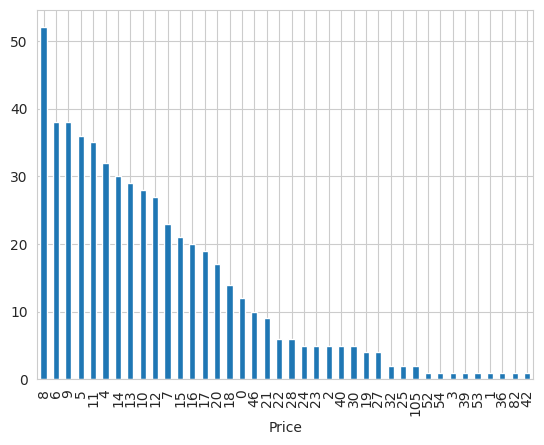

In [ ]:
df['Price'].value_counts().plot(kind="bar")

<Axes: xlabel='Year'>

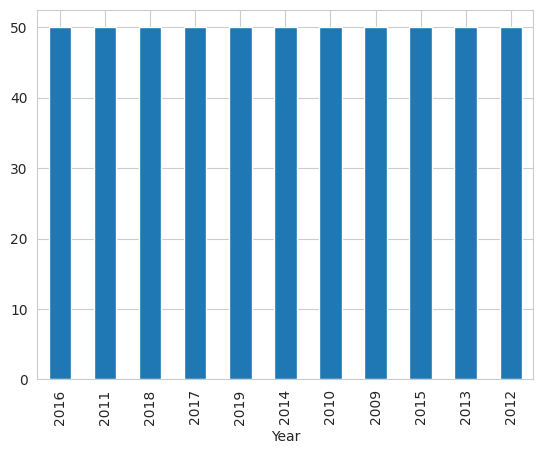

In [ ]:
df['Year'].value_counts().plot(kind="bar")

# PIE PLOT

<Axes: ylabel='count'>

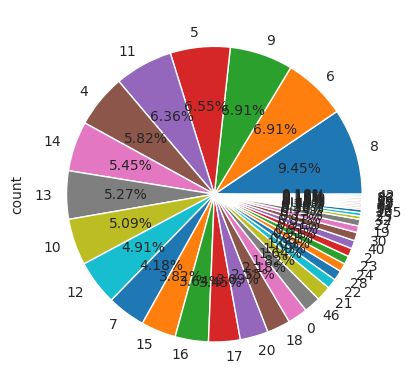

In [ ]:
df['Price'].value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

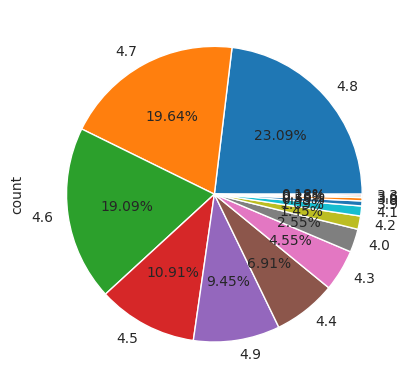

In [ ]:
df['User Rating'].value_counts().plot(kind="pie",autopct="%.2f%%")

# PAIRPLOT

<Figure size 5000x1000 with 0 Axes>

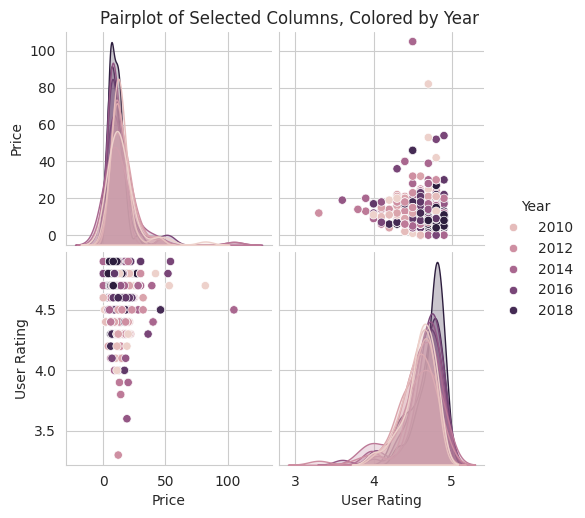

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 10))
selected_columns = ['Price', 'Author', 'User Rating', 'Year']
df_subset = df[selected_columns]
df_subset = df_subset.dropna()

sns.pairplot(df_subset, hue='Year')
plt.suptitle('Pairplot of Selected Columns, Colored by Year', y=1.02)  # Adjust title position
plt.show()


# SCATTER PLOT

<Figure size 1000x1000 with 0 Axes>

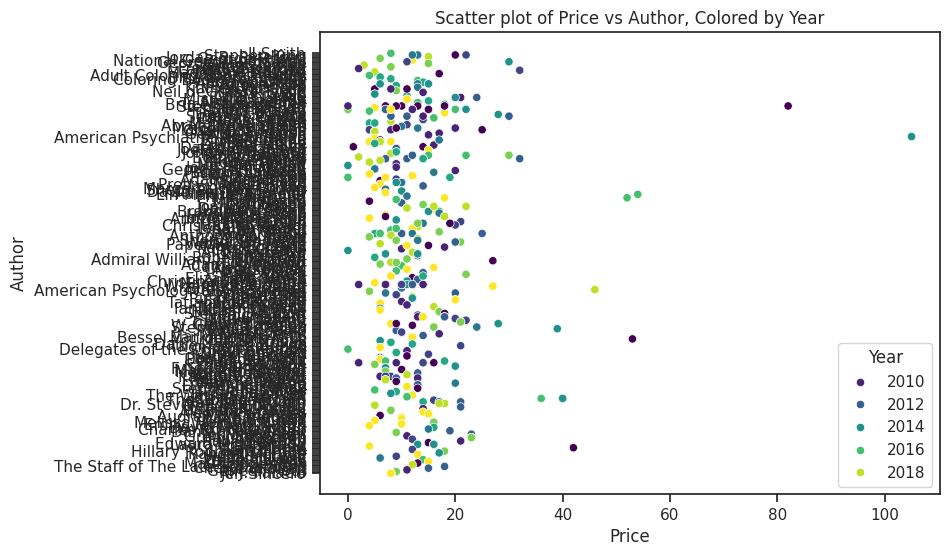

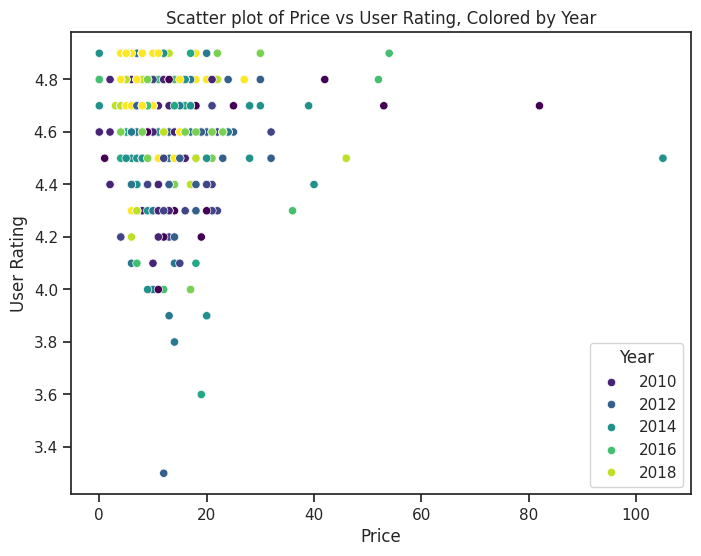

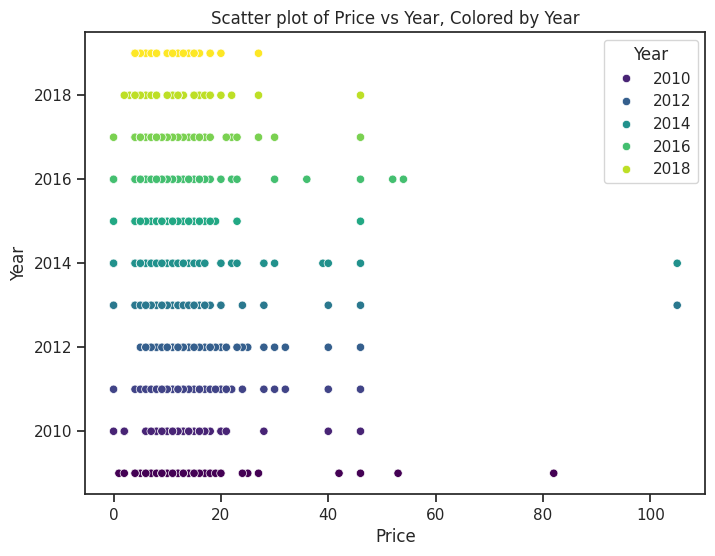

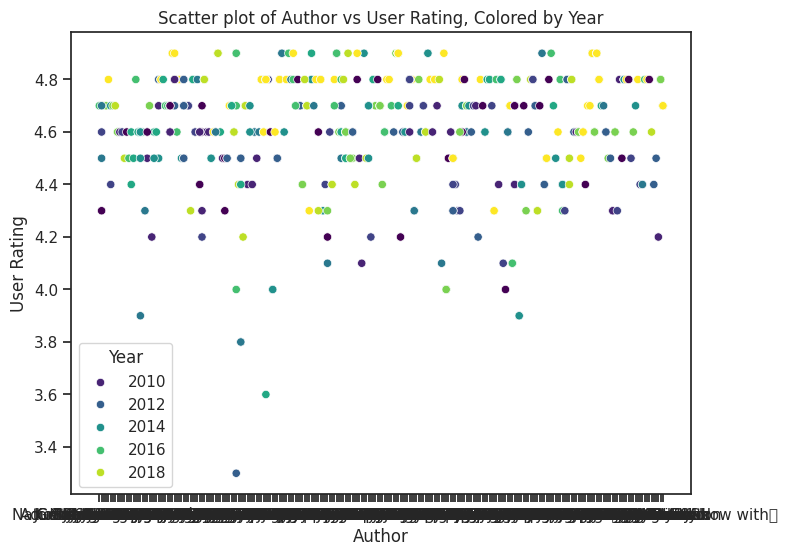

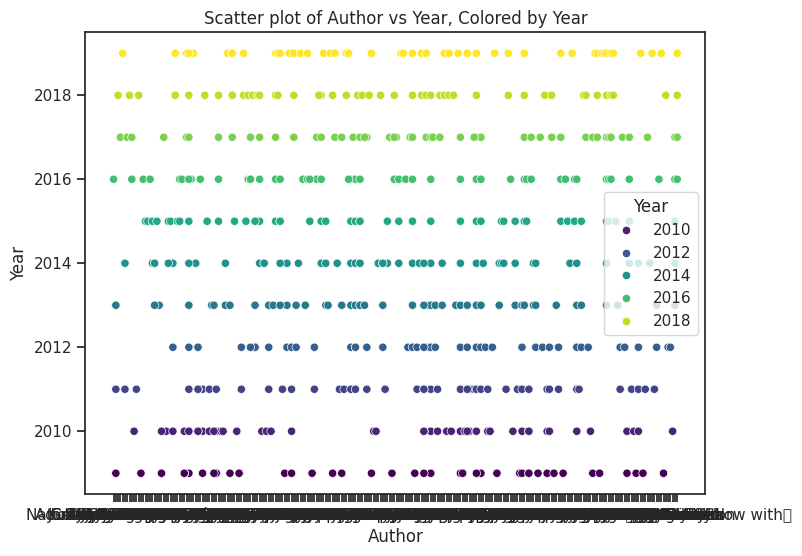

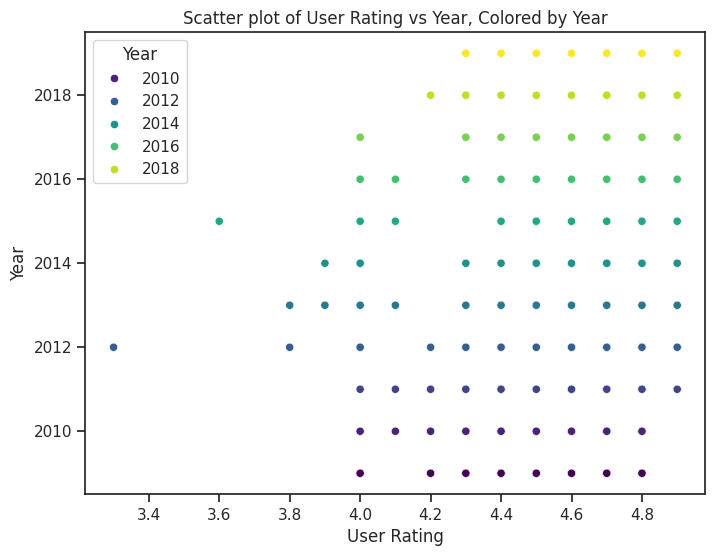

In [ ]:
selected_columns = ['Price', 'Author', 'User Rating', 'Year']
df_subset = df[selected_columns]
df_subset = df_subset.dropna()
plt.figure(figsize=(10, 10))
sns.set(style="ticks")
for i, column_x in enumerate(selected_columns[:-1]):
    for j, column_y in enumerate(selected_columns[i+1:]):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_subset, x=column_x, y=column_y, hue='Year', palette='viridis')
        plt.title(f'Scatter plot of {column_x} vs {column_y}, Colored by Year')
        plt.xlabel(column_x)
        plt.ylabel(column_y)
        plt.show()


# BOX PLOT

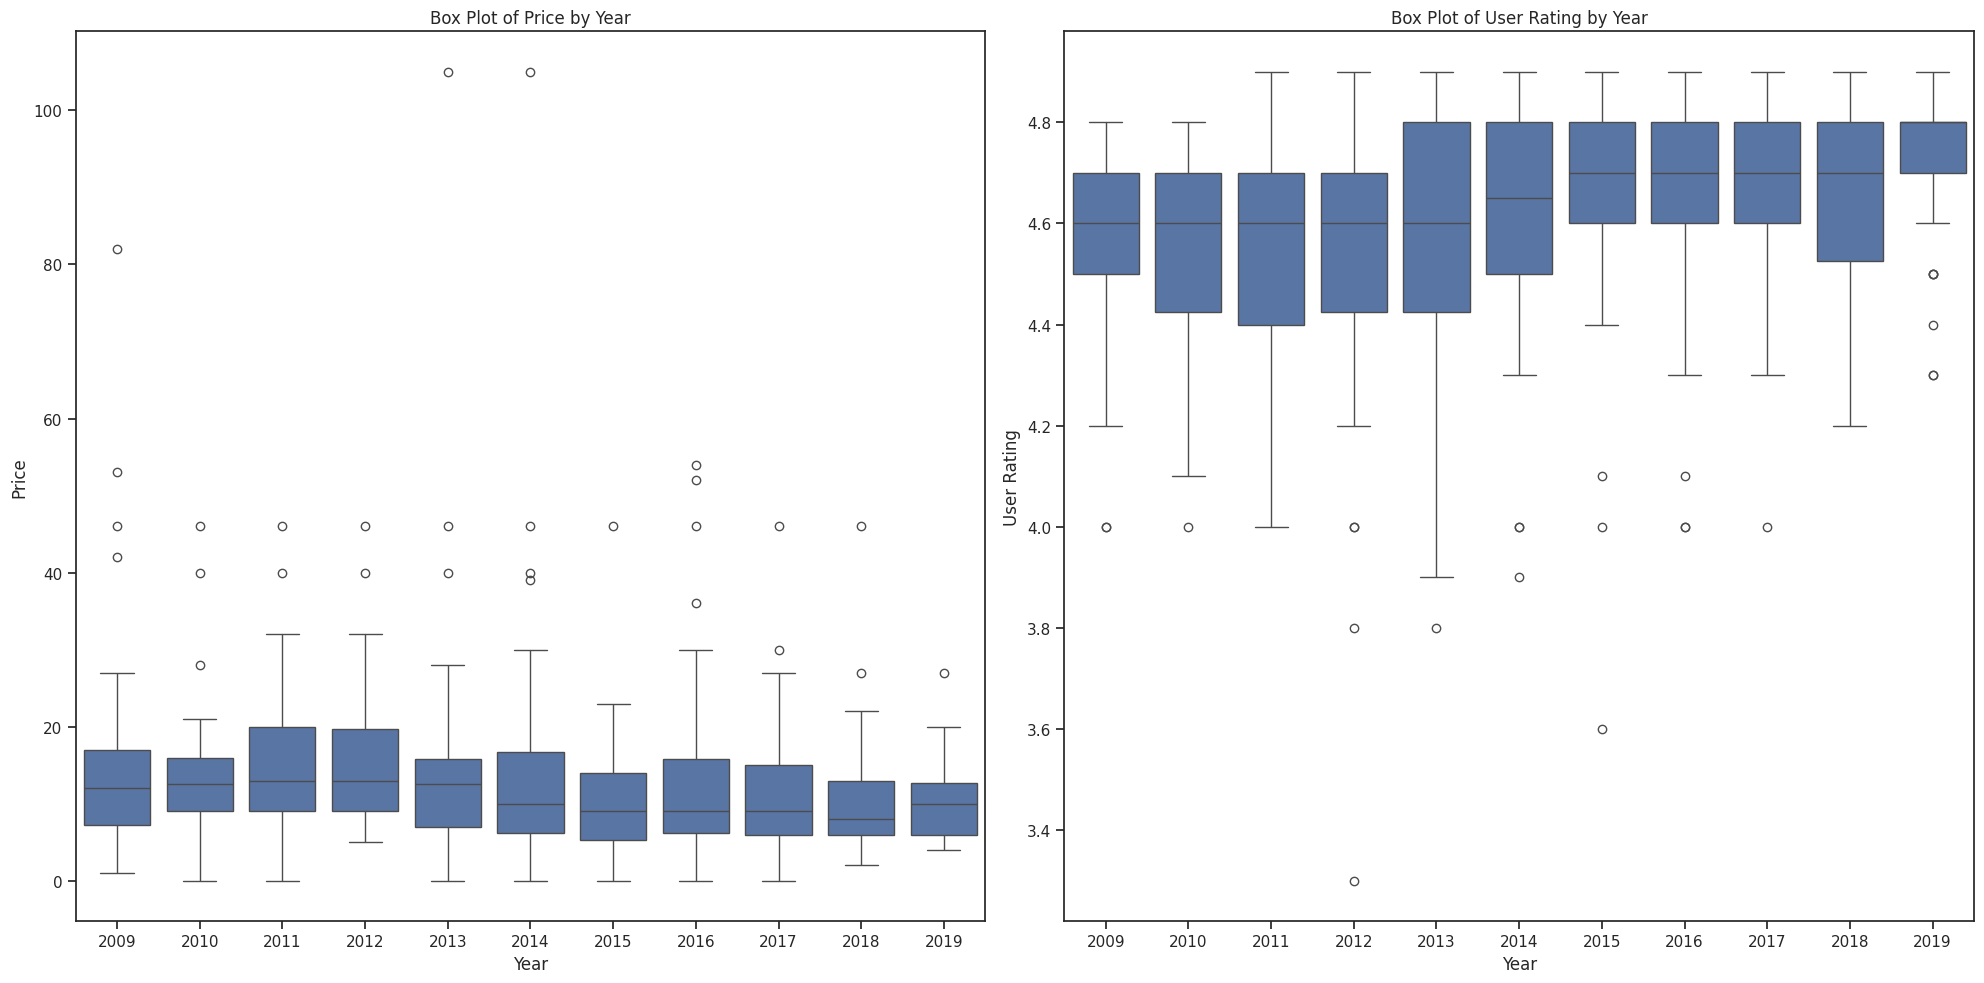

In [ ]:
selected_columns = ['Price', 'User Rating', 'Year']
df_subset = df[selected_columns]
df_subset = df_subset.dropna()
plt.figure(figsize=(20, 10))
for i, col in enumerate(['Price', 'User Rating']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Year', y=col, data=df_subset)
    plt.title(f'Box Plot of {col} by Year')
plt.tight_layout()
plt.show()


# DISTRIBUTION PLOT

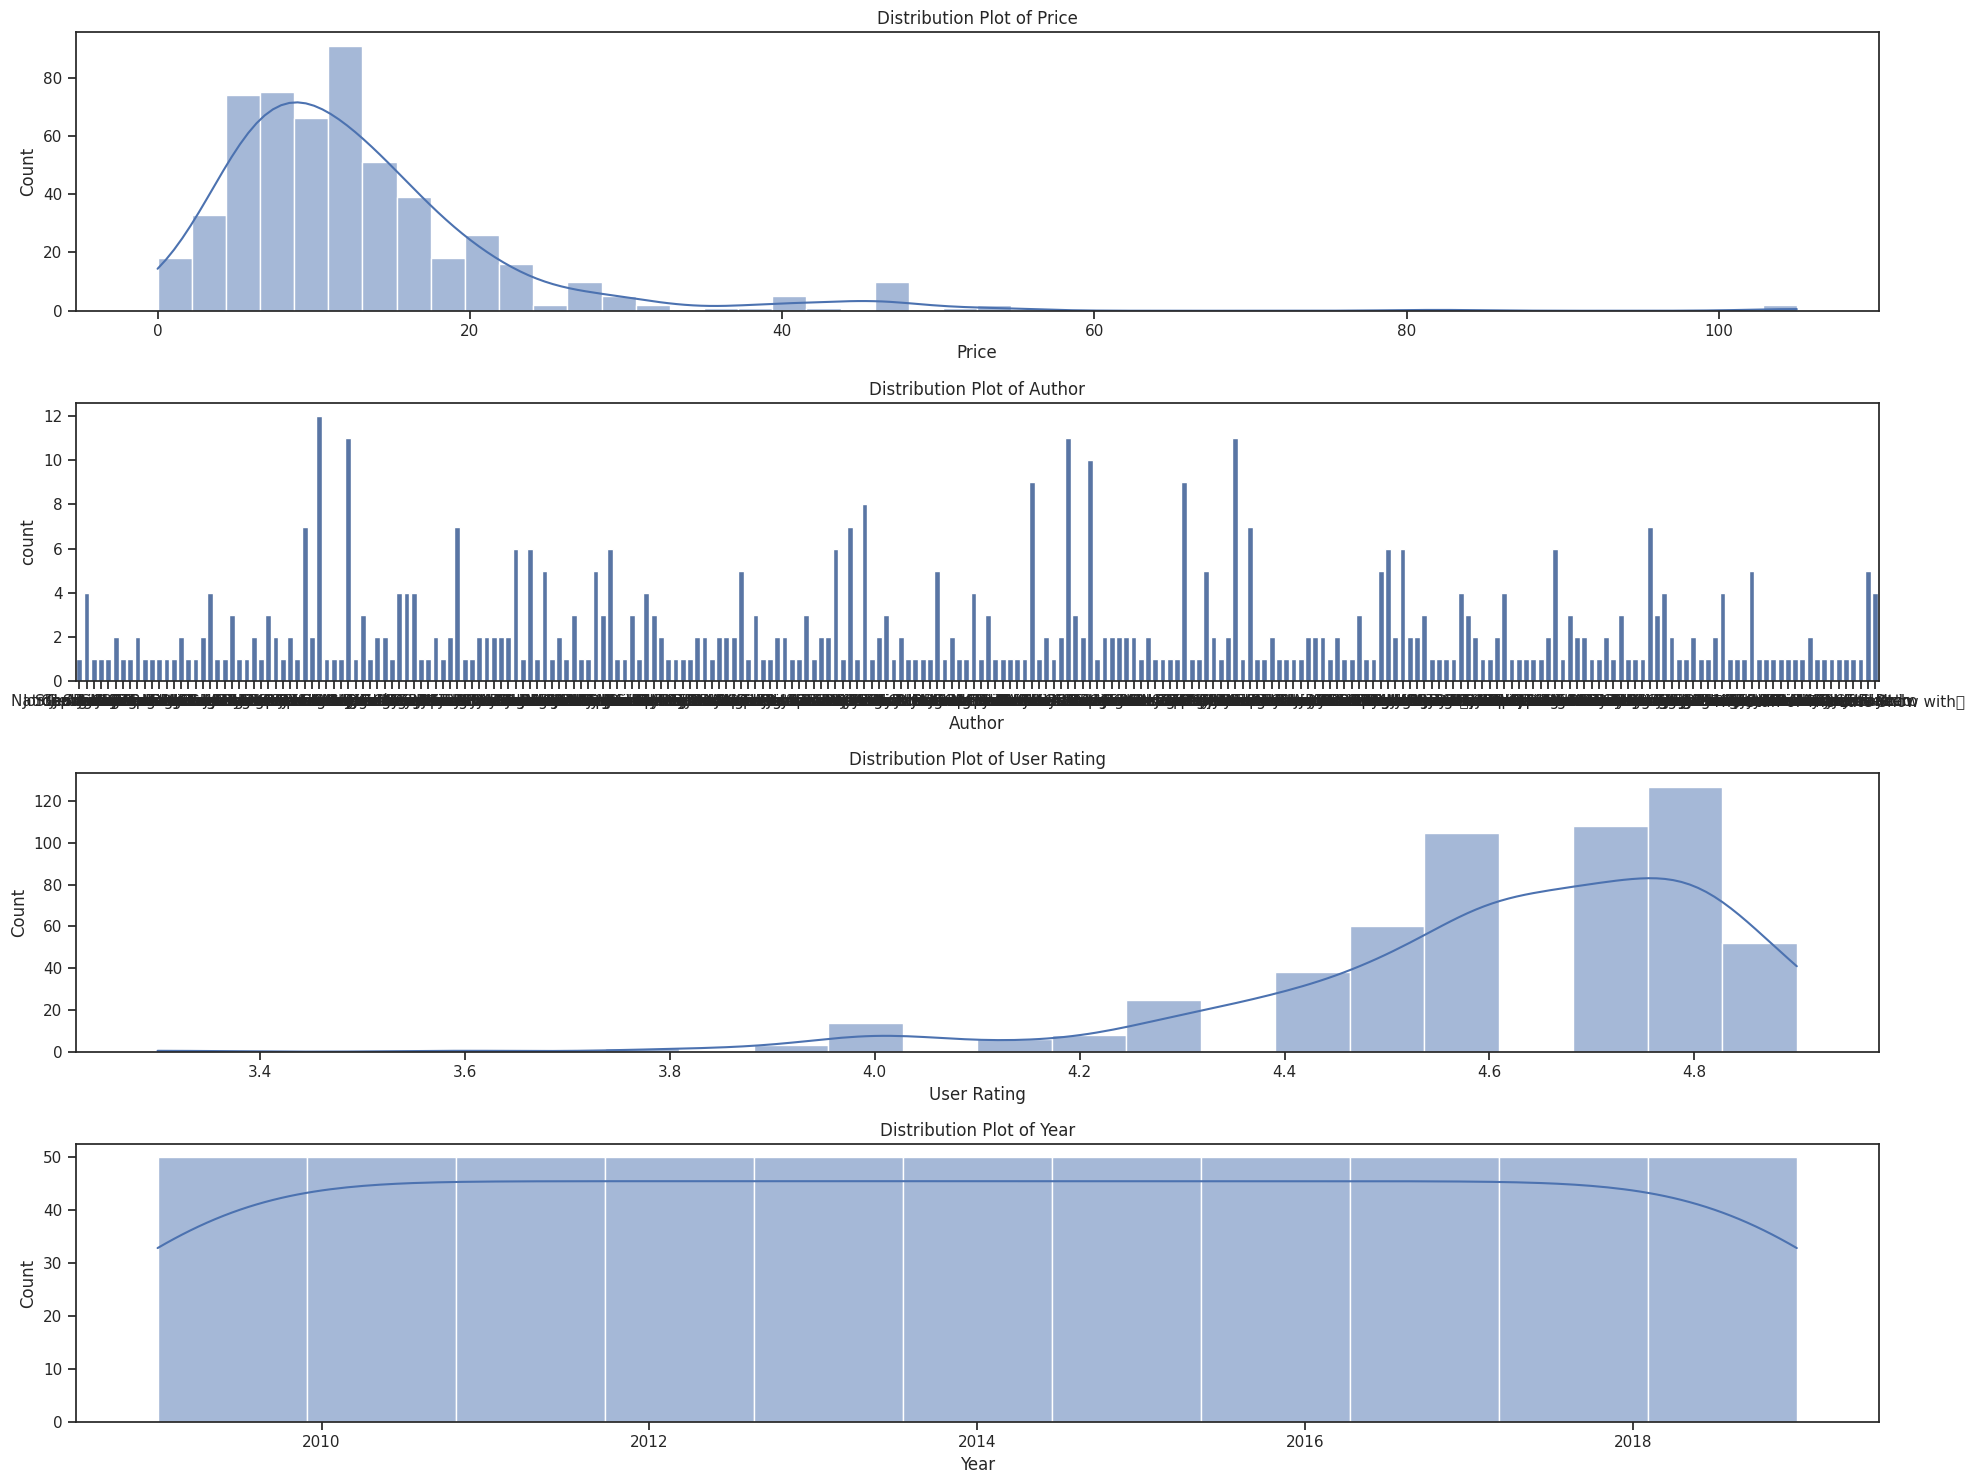

In [ ]:
selected_columns = ['Price', 'Author', 'User Rating', 'Year']
df_subset = df[selected_columns]
df_subset = df_subset.dropna()

plt.figure(figsize=(20, 15))
for i, column in enumerate(selected_columns):
    plt.subplot(len(selected_columns), 1, i + 1)
    if column in ['Price', 'User Rating', 'Year']:
        sns.histplot(df_subset[column], kde=True)
    else:
        sns.countplot(x=df_subset[column])
    plt.title(f'Distribution Plot of {column}')

plt.tight_layout()
plt.show()


# HEATMAP

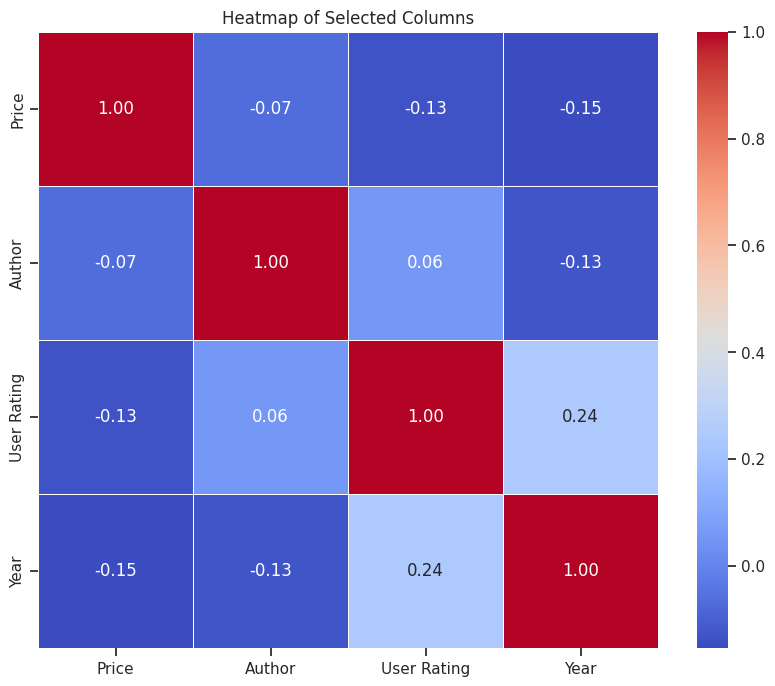

In [ ]:
selected_columns = ['Price', 'Author', 'User Rating', 'Year']
df_subset = df[selected_columns]
df_subset = df_subset.dropna()
df_subset_encoded = df_subset.copy()
df_subset_encoded['Author'] = df_subset_encoded['Author'].astype('category').cat.codes

corr_matrix = df_subset_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()


# COUNT PLOT

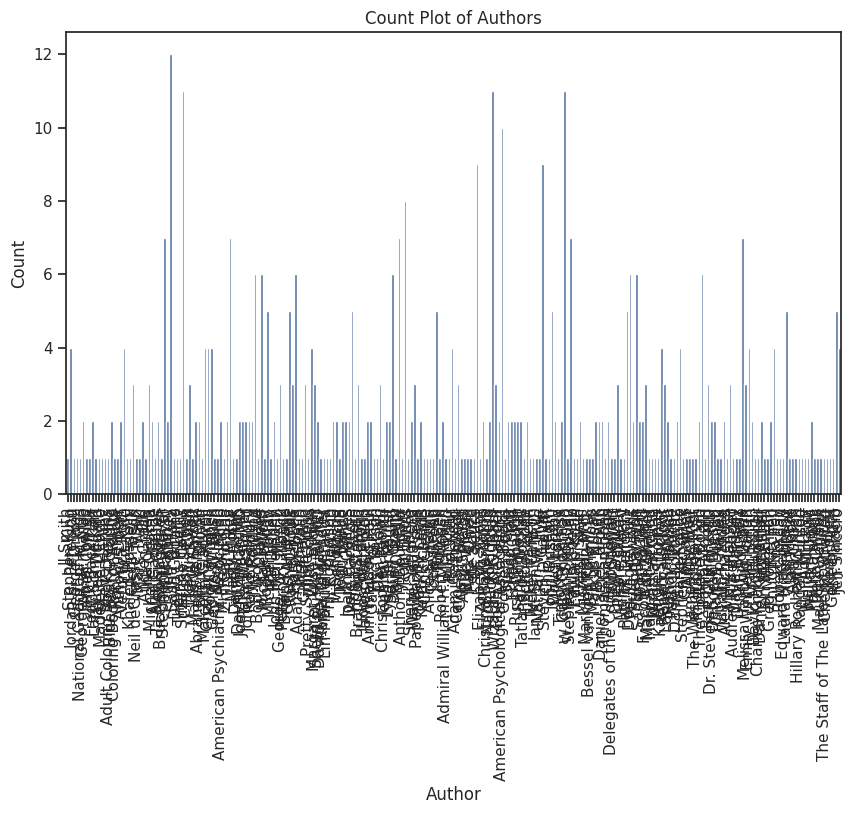

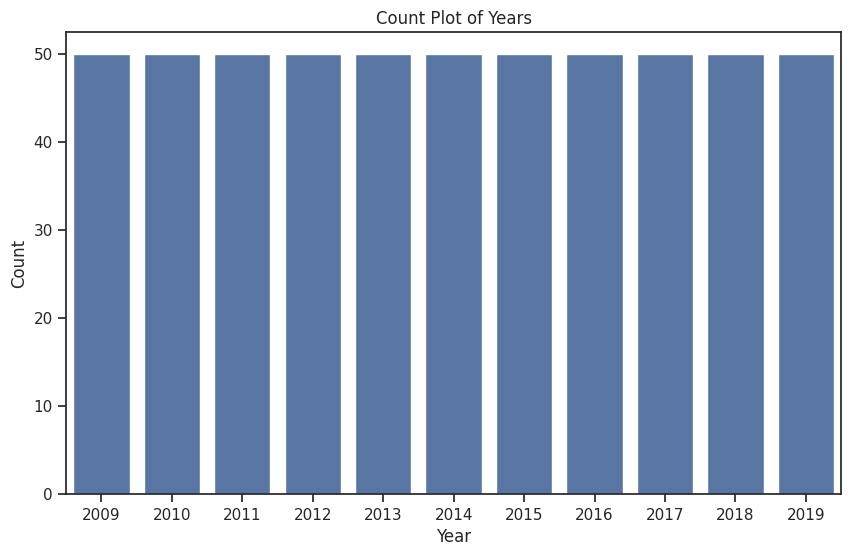

In [ ]:
selected_columns = ['Price', 'Author', 'User Rating', 'Year']
df_subset = df[selected_columns]
df_subset = df_subset.dropna()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Author')
plt.title('Count Plot of Authors')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Year')
plt.title('Count Plot of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


# WORD CLOUD

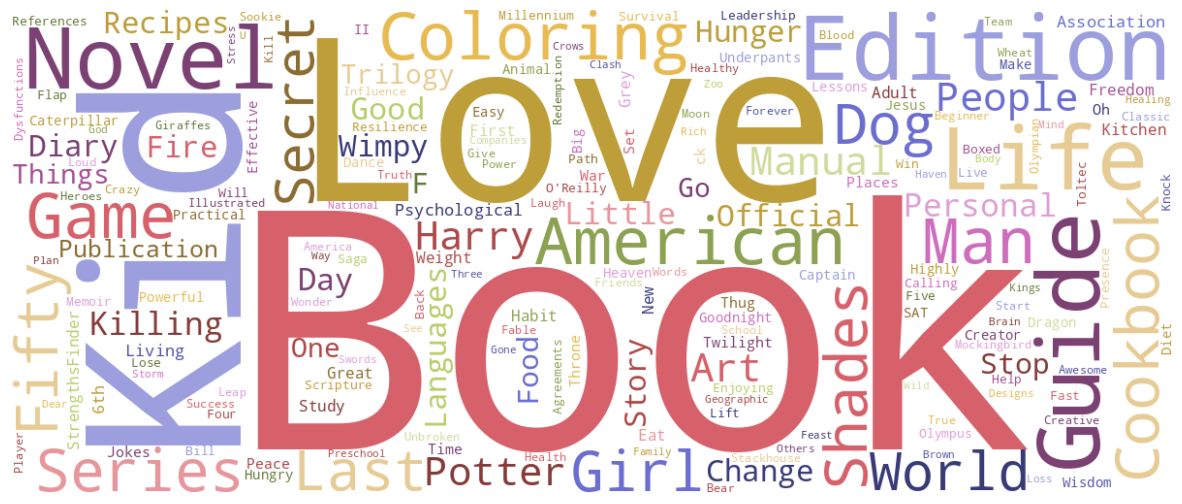

In [ ]:
import wordcloud
title_words = list(df["Name"].apply(lambda x: x.split() if isinstance(x, str) else []))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# LINEAR REGRESSION

In [ ]:
numerical_columns = ['Price', 'User Rating', 'Year']
X = df[numerical_columns].values
y = df.iloc[:, -1].values

# TRAINING AND TEST THE MODEL

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.20, random_state = 0)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(y.dtype)

object


In [ ]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

# PRINTING THE MEAN ABOSLUTE ERROR
# AND MEAN SQUARED ERROR
# AND ROOT MEAN SQUARED ERROR

In [ ]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 0.46992857485007894
Mean Squared Error (MSE): 0.24406421679271426
Root Mean Squared Error (RMSE): 0.4940285586812915


# PRINT THE CONFUSION MATRIX
# AND ACCURACY SCORE OF DATA

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred=spam_detect_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[27 23]
 [25 35]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.5636363636363636
